# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

https://github.com/32juan/summative1


3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('attendance_anonymised-1.csv')

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [9]:
df.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

In [12]:
df.describe(include ='all')

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
count,17053.000000,17053.000000,17053.000000,17053,17053,17053,17053.000000,17053.000000,17053.000000,17053,17053,17038,17053.000000,17053.000000,17038
unique,NaN,NaN,NaN,103,109,50,NaN,NaN,NaN,661,667,3,NaN,NaN,7
top,NaN,NaN,NaN,Thomas,Elena,Algorithms,NaN,NaN,NaN,2025-06-19,2024-07-19,Y,NaN,NaN,P
freq,NaN,NaN,NaN,539,468,1140,NaN,NaN,NaN,144,144,12219,NaN,NaN,7899
mean,258.244473,1252.674016,2023.913212,NaN,NaN,NaN,495.752536,504.818742,572.408139,NaN,NaN,NaN,0.716531,0.732892,NaN
std,146.904888,530.609058,0.774686,NaN,NaN,NaN,292.031166,275.174454,313.946746,NaN,NaN,NaN,0.450695,0.442462,NaN
min,1.000000,4.000000,2023.000000,NaN,NaN,NaN,1.000000,7.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,146.000000,840.000000,2023.000000,NaN,NaN,NaN,223.000000,267.000000,297.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,265.000000,1306.000000,2024.000000,NaN,NaN,NaN,515.000000,504.000000,574.000000,NaN,NaN,NaN,1.000000,1.000000,NaN
75%,384.000000,1749.000000,2025.000000,NaN,NaN,NaN,788.000000,733.000000,839.000000,NaN,NaN,NaN,1.000000,1.000000,NaN


In [13]:
df.isnull().sum()

Person Code                0
Unit Instance Code         0
Calocc Code                0
Surname                    0
Forename                   0
Long Description           0
Register Event ID          0
Object ID                  0
Register Event Slot ID     0
Planned Start Date         0
Planned End Date           0
is Positive               15
Postive Marks              0
Negative Marks             0
Usage Code                15
dtype: int64

3. Drop the `Planned End Date` column.


In [25]:
print(df.columns)

Index(['Person Code', 'Unit Instance Code', 'Calocc Code', 'Surname',
       'Forename', 'Long Description', 'Register Event ID', 'Object ID',
       'Register Event Slot ID', 'Planned Start Date', 'Planned End Date',
       'is Positive', 'Postive Marks', 'Negative Marks', 'Usage Code'],
      dtype='object')


In [26]:
df = df.drop(columns=['Planned End Date'])

print(df.columns)  

Index(['Person Code', 'Unit Instance Code', 'Calocc Code', 'Surname',
       'Forename', 'Long Description', 'Register Event ID', 'Object ID',
       'Register Event Slot ID', 'Planned Start Date', 'is Positive',
       'Postive Marks', 'Negative Marks', 'Usage Code'],
      dtype='object')


4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [27]:
df = df.rename(columns={
    'Person Code': 'Person Code',
    'Unit Instance Code': 'Module Code',
    'Calocc Code': 'Year',
    'Surname': 'Surname',
    'Forename': 'Forename',
    'Long Description': 'Module Name',
    'Register Event ID': 'Event ID',
    'Object ID': 'Object ID',
    'Register Event Slot ID': 'Event Slot ID',
    'Planned Start Date': 'Date',
    'is Positive': 'Has Attended',
    'Postive Marks': 'Attended',
    'Negative Marks': 'NotAttended',
    'Usage Code': 'Attendance Code'
})


df.columns

Index(['Person Code', 'Module Code', 'Year', 'Surname', 'Forename',
       'Module Name', 'Event ID', 'Object ID', 'Event Slot ID', 'Date',
       'Has Attended', 'Attended', 'NotAttended', 'Attendance Code'],
      dtype='object')

5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date'].head()

0   2025-04-03
1   2023-11-03
2   2024-07-03
3   2024-10-09
4   2023-12-27
Name: Date, dtype: datetime64[ns]

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [31]:
print(df['Module Name'].unique())

['Nursing' 'Italian' 'History' 'Arabic' 'Database Design' 'Spanish'
 'Journalism' 'International Business' 'Project Management' 'Algorithms'
 'System Administration' 'Public Speaking' 'Cloud Computing'
 'English Literature' 'Cybersecurity' 'Discrete Mathematics' 'Linguistics'
 'French' 'Music Theory' 'Religious Studies' 'Marketing'
 'User Experience Design' 'Theater' 'Biology' 'Statistics' 'Nutrition'
 'Chemistry' 'Linear Algebra' 'Leadership' 'Biomedical Engineering'
 'Digital Systems' 'Political Science' 'Arts & Crafts'
 'Occupational Therapy' 'Quality Assurance' 'Ethics' 'Creative Writing'
 'Information Technology' 'Graphic Design' 'Data Science'
 'Web Development' 'Japanese' 'Data Analysis' 'Epidemiology' 'Geography'
 'Medicine' 'Strategic Planning' 'Pharmacy' 'Business Intelligence'
 'Demographics']


In [35]:
module_name = 'Spanish'
spanish_df = df[df['Module Name'] == module_name]
spanish_df.head()

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
10,440,1622,2023,Jain,Yang,Spanish,286,846,453,2023-04-13,N,0,0,A
15,225,1622,2023,Robert,Elena,Spanish,286,924,453,2023-04-13,Y,1,1,P
16,225,1622,2025,Robert,Elena,Spanish,286,924,426,2025-08-25,Y,1,1,P
17,225,1622,2024,Robert,Elena,Spanish,286,924,232,2024-02-29,Y,1,1,P
20,1,1622,2024,Rodriguez,Ahmad,Spanish,286,682,859,2024-09-13,Y,1,1,P


In [ ]:
ad = spanish_df.groupby('Date')['Attended'].mean()
# Calculate average attendance rate per date

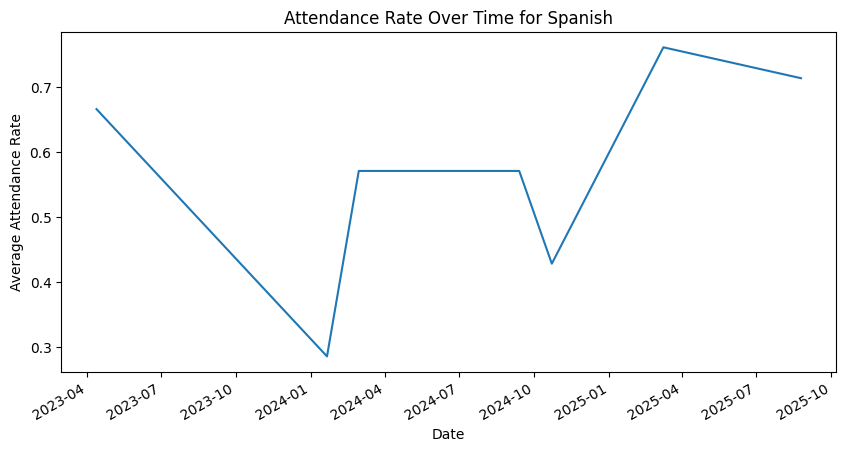

In [42]:
plt.figure(figsize=(10,5))
ad.plot()
plt.title(f'Attendance Rate Over Time for Spanish')
plt.xlabel('Date')
plt.ylabel('Average Attendance Rate')
plt.show()
# Plot attendance date average against date of session

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [44]:
sa = df.groupby('Person Code')['Attended'].mean()
# Calculate average attendance rate per student

df['Student Overall Attendance'] = df['Person Code'].map(sa)
# Add overall attendance rate per student to main dataframe

df['Standardised Student Overall Attendance'] = (
    (df['Student Overall Attendance'] - df['Student Overall Attendance'].mean())
    / df['Student Overall Attendance'].std()
)
# Calculate standardised attendance rate per student

df[['Person Code', 'Student Overall Attendance', 'Standardised Student Overall Attendance']].head()

,Person Code,Student Overall Attendance,Standardised Student Overall Attendance
0,129,0.875000,0.777499
1,129,0.875000,0.777499
2,280,0.216216,-2.454698
3,280,0.216216,-2.454698
4,280,0.216216,-2.454698


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [45]:
module_attendance_stats = df.groupby('Module Name')['Attended'].agg(['mean', 'std'])
# Group by module name to get mean and std dev of attendance rate

module_attendance_stats.head()

,mean,std
Module Name,,
Algorithms,0.744737,0.436200
Arabic,0.752266,0.432023
Arts & Crafts,0.605263,0.489715
Biology,0.618750,0.486454
Biomedical Engineering,0.650000,0.483046


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


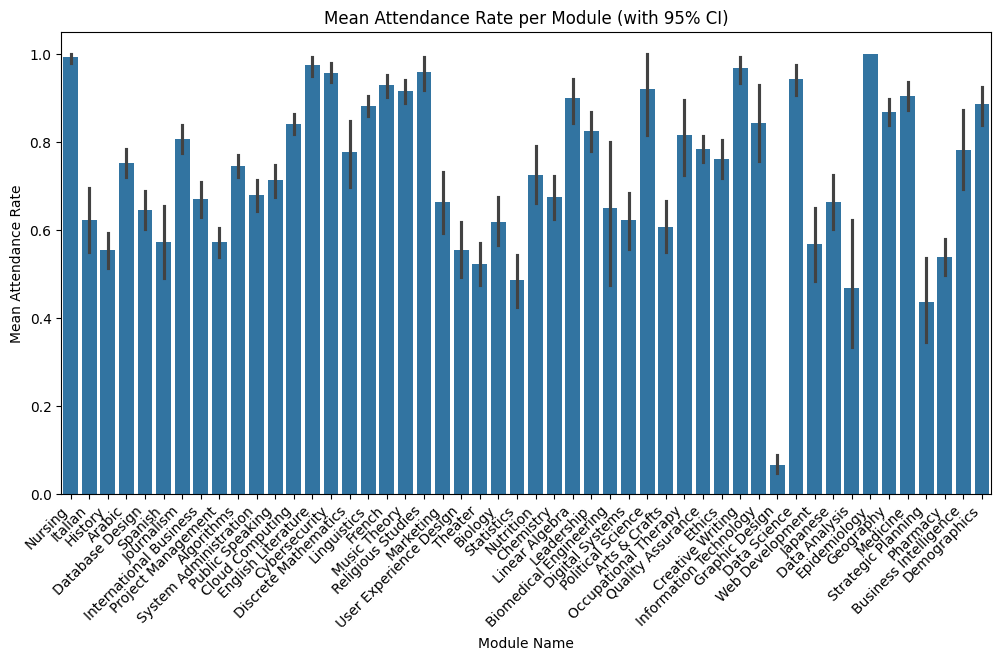

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Module Name',
    y='Attended',
    errorbar=('ci', 95),
    estimator='mean'
)
plt.title("Mean Attendance Rate per Module (with 95% CI)")
plt.ylabel("Mean Attendance Rate")
plt.xlabel("Module Name")
plt.xticks(rotation=45, ha='right')
plt.show()

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

The plot shows the mean attendance rate of each module, with the error bar indicating the 95% confidence level of that mean. This shows that if we repeated the study many times, 95% of the time, our mean rate would fall within the error bar shown. Results with larger error bars indicate more uncertainity in the average, which can be due to higher variation in attendance from session to session or a smaller number of students in the module.

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [55]:
student_attendance = df.groupby('Person Code')['Attended'].mean()
# Student attendance rate calculation

df['Student Overall Attendance'] = df['Person Code'].map(student_attendance)
# Each row now has student overall attendance rate

summary = df.groupby('Module Name').agg(
    module_mean_attendance=('Attended', 'mean'),
    student_mean_attendance=('Student Overall Attendance', 'mean')
).reset_index()
# Each module now has mean attendance rate and mean overall student attendance rate

print(summary.head())

              Module Name  module_mean_attendance  student_mean_attendance
0              Algorithms                0.744737                 0.710615
1                  Arabic                0.752266                 0.647835
2           Arts & Crafts                0.605263                 0.705918
3                 Biology                0.618750                 0.636538
4  Biomedical Engineering                0.650000                 0.701747


In [56]:
from scipy.stats import pearsonr

corr, pval = pearsonr(summary['student_mean_attendance'], summary['module_mean_attendance'])
print(f"Correlation: {corr:.2f}, p-value: {pval:.3g}")

Correlation: 0.68, p-value: 4.69e-08


In [57]:
import statsmodels.api as sm

X = sm.add_constant(summary['student_mean_attendance'])
y = summary['module_mean_attendance']
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     module_mean_attendance   R-squared:                       0.466
Model:                                OLS   Adj. R-squared:                  0.455
Method:                     Least Squares   F-statistic:                     41.93
Date:                    Thu, 13 Nov 2025   Prob (F-statistic):           4.69e-08
Time:                            03:16:59   Log-Likelihood:                 29.889
No. Observations:                      50   AIC:                            -55.78
Df Residuals:                          48   BIC:                            -51.95
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Both the correlation and linear regression shows a strong positive correlation between the average attendance of students and the attendance rates of the modules they attend. The correlation coefficient of 0.68 p < 0.001 indicates that students with low attendance are more likely to attend modules with low attendance rates. The regression analysis supports this, with a slope gradient of 0.9893 showing nearly 1 to 1 correlation that modules attended by higher attendance students see higher moduel attendance and an r-squared value of 0.47 which shows that nearly half the variation in attendance of modules can be explained by students overall attendance habits. Overall, students who have lower attendance are more likely to be found in modules where attendance is lower. 

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!